In [1]:
library(ggplot2)
library(boot)
library(glue)
library(dplyr)
library(tidyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [ ]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)
set.seed(23)
options(warn = -1) # Bỏ qua warning

In [3]:
# Dùng các hàm từ functions.R
source("functions.R")

# BÀI 1

In [4]:
df = read_csv_function(base_path = base_path, file_name = "Bangladesh.csv")
head(df)

,Arsenic,Chlorine,Cobalt
,<dbl>,<dbl>,<dbl>
1,2400,6.2,0.42
2,6,116.0,0.45
3,904,14.8,0.63
4,321,35.9,0.68
5,1280,18.9,0.58
6,151,7.8,0.35


### EDA

In [5]:
EDA_function(df)

So dong cua du lieu: 271
So cot cua du lieu: 3
[1] "Cau truc cua du lieu: "
'data.frame':	271 obs. of  3 variables:
 $ Arsenic : num  2400 6 904 321 1280 151 141 1050 511 688 ...
 $ Chlorine: num  6.2 116 14.8 35.9 18.9 7.8 56.3 16 40.4 29.3 ...
 $ Cobalt  : num  0.42 0.45 0.63 0.68 0.58 0.35 0.46 0.59 0.48 0.87 ...
NULL
[1] "unique cua tung cot"
Arsenic: 149
Chlorine: 202
Cobalt: 103
[1] "Gia tri bi thieu:"


Arsenic Chlorine   Cobalt 
       0        2        1

In [6]:
check_missing_value_function(df)

Du lieu co 3 dong bi thieu, chiem 1.1070110701107%


,Arsenic,Chlorine,Cobalt
,<dbl>,<dbl>,<dbl>
211,6.0,NA,0.31
268,88.6,NA,0.58
252,670.0,17.5,NA


In [7]:
df = delete_nan_function(df, c("Chlorine"))

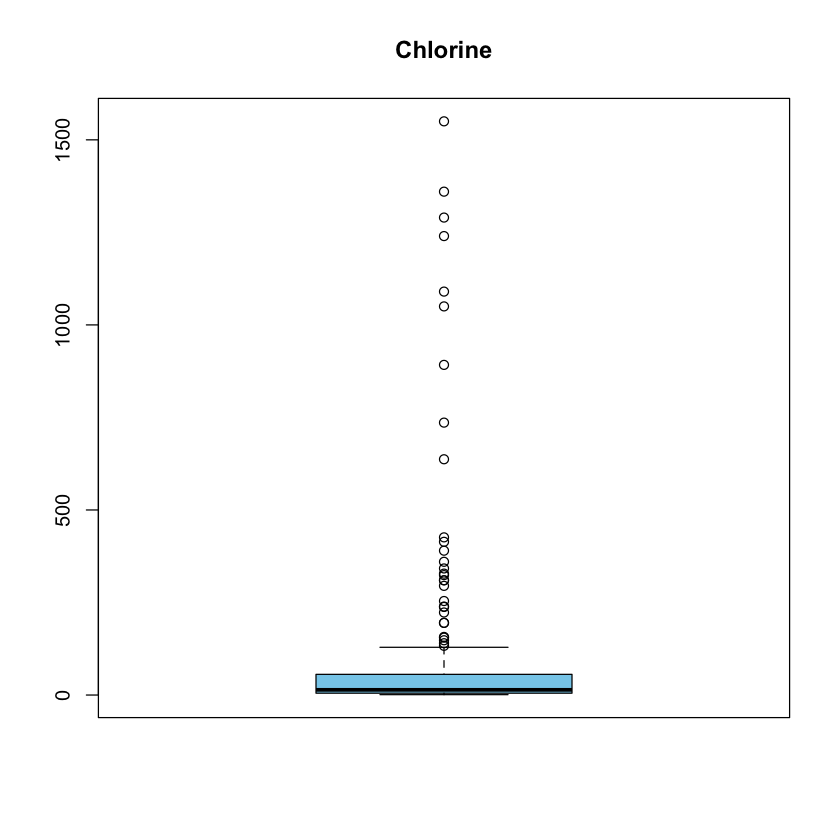

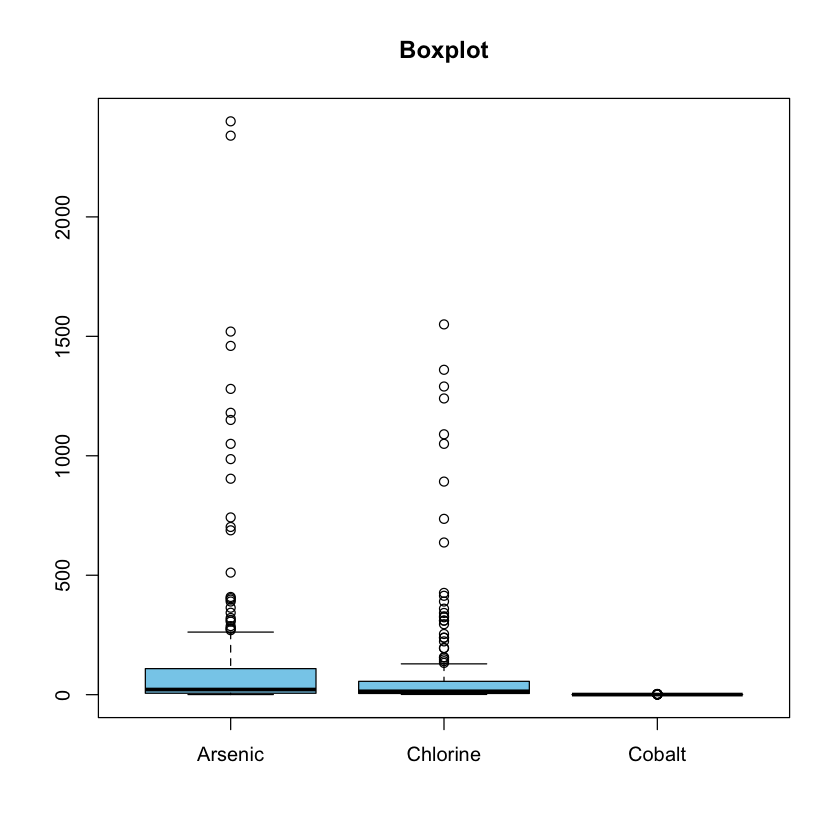

In [8]:
box_plot_function(df, list_col = c("Chlorine"))

- Biến Chlorine có rất nhiều giá trị ngoại lai

In [9]:
check_outlier_function(df, c("Chlorine"))

[1] "So outlier cua cot  Chlorine :  30"
[1] "Tong so outlier cua df:  30"
Phan tram outlier: 11.1940298507463%


,Arsenic,Chlorine,Cobalt
,<dbl>,<dbl>,<dbl>
30,13.0,148,0.39
35,364.0,360,0.77
39,270.0,390,1.28
43,82.0,239,0.34
48,180.0,1240,1.01
50,6.0,295,0.24
51,38.0,157,0.29
54,8.0,637,0.32
55,85.0,133,0.57


### (b) Bootstrap giá trị trung bình cho nồng độ chlorine.

In [10]:
out_boot <- boot(data = df$Chlorine, statistic = boot_mu_fun, R = 1000)
out_boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$Chlorine, statistic = boot_mu_fun, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 78.31007 0.05565784    12.90859

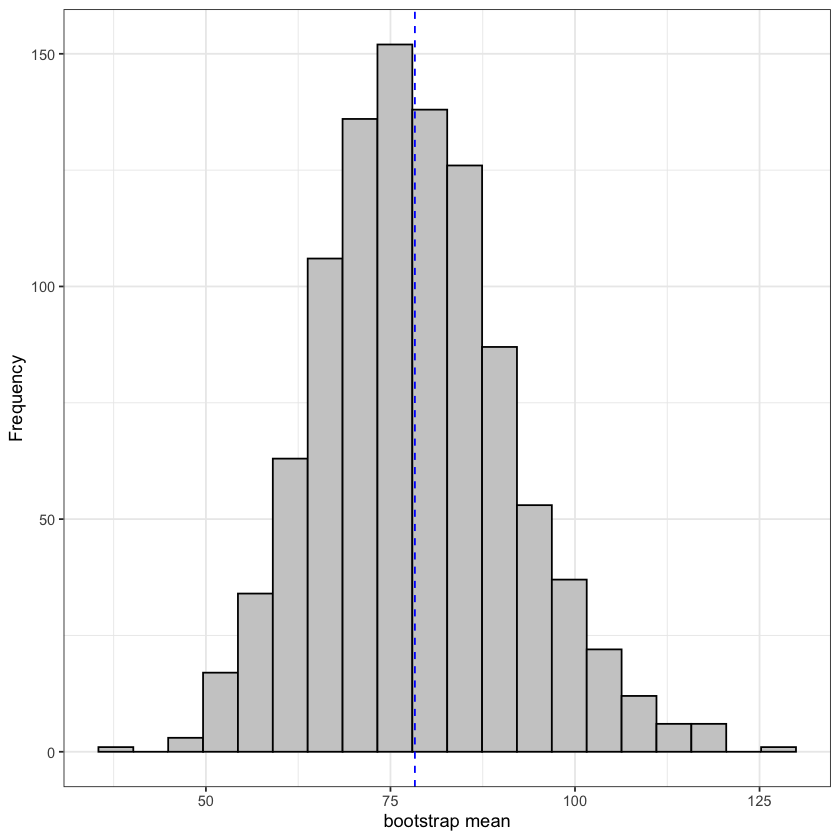

In [11]:
ggplot(data = data.frame(t = out_boot$t), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_boot$t0, color = "blue", linetype = "dashed") +
xlab("bootstrap mean") + ylab("Frequency") +
theme_bw()

### (c) Tìm và giải thích các khoảng tin cậy bootstrap 95%.

In [12]:

out_boot = boot(data =df$Chlorine,
statistic = mean_boot_ktc_fun,
R = 1000
)
out_boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$Chlorine, statistic = mean_boot_ktc_fun, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1*  78.31007  0.009202239    12.58799
t2* 165.14725 -0.218518741    51.44540

In [13]:
# Khoảng tin cậy bootsrap 95%:
boot.ci(out_boot, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   ( 53.63, 102.97 )   ( 52.15, 100.17 )   ( 57.18, 109.01 )  

Level     Percentile            BCa          
95%   ( 56.45, 104.47 )   ( 59.36, 110.19 )  
Calculations and Intervals on Original Scale

- Normal Interval (Khoảng tin cậy chuẩn): Dựa trên giả định phân phối chuẩn. Khoảng tin cậy 95%: (52.84, 102.90)
- Basic Interval (Khoảng tin cậy cơ bản): Sử dụng bách phân vị của phân phối bootstrap mà không hiệu chỉnh. Khoảng tin cậy 95%: (51.08, 101.10)
- Studentized Interval (Khoảng tin cậy Studentized): Hiệu chỉnh phương sai để điều chỉnh cho sự không đồng nhất. Khoảng tin cậy 95%: (57.04, 111.00)
- Percentile Interval (Khoảng tin cậy bách phân vị): Sử dụng bách phân vị của phân phối bootstrap. Khoảng tin cậy 95%: (55.52, 105.54)
- BCa Interval (Khoảng tin cậy hiệu chỉnh thiên lệch và độ lệch): Khoảng tin cậy 95%: (58.16, 110.77)

### (d). Ước tính bootstrap của độ lệch là bao nhiêu? Tỷ số giữa độ lệch và sai số chuẩn bootstrap là bao nhiêu?

- Độ lệch của t1: 0.009202239
- Độ lệch của t2: -0.218518741
- Ước tính bootstrap của độ lệch (t1): 0.009202239
- Tỷ số giữa độ lệch và sai số chuẩn bootstrap (t1): 0.00073
- Ước tính bootstrap của độ lệch (t2): -0.218518741
- Tỷ số giữa độ lệch và sai số chuẩn bootstrap (t2): -0.00425

# BÀI 2

In [14]:
out_boot_trim = boot(data =df$Chlorine,
statistic = mean_trim_boot_ktc_fun,
R = 1000
)
out_boot_trim


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$Chlorine, statistic = mean_trim_boot_ktc_fun, 
    R = 1000)


Bootstrap Statistics :
     original     bias    std. error
t1*  23.28989  0.1609697    3.015285
t2* 165.14725 -0.1272367   52.977241

In [15]:
# Khoảng tin cậy bootsrap 95% cho trim mean:
boot.ci(out_boot_trim, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot_trim, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   (17.22, 29.04 )   (16.69, 28.43 )   (17.14, 29.20 )  

Level     Percentile            BCa          
95%   (18.15, 29.89 )   (18.49, 30.44 )  
Calculations and Intervals on Original Scale

In [16]:
# Khoảng tin cậy bootsrap 95% cho mean:
boot.ci(out_boot, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   ( 53.63, 102.97 )   ( 52.15, 100.17 )   ( 57.18, 109.01 )  

Level     Percentile            BCa          
95%   ( 56.45, 104.47 )   ( 59.36, 110.19 )  
Calculations and Intervals on Original Scale

- Tất cả các khoảng tin cậy cho trimmed mean đều nhỏ hơn so với khoảng tin cậy cho mean

# BÀI 3

In [17]:
df = read_csv_function(base_path, "FishMercury.csv")
# names(df) = c("Mercury")
head(df)


,Mercury
,<dbl>
1,1.870
2,0.160
3,0.088
4,0.160
5,0.145
6,0.099


In [18]:
EDA_function(df)

So dong cua du lieu: 30
So cot cua du lieu: 1
[1] "Cau truc cua du lieu: "
'data.frame':	30 obs. of  1 variable:
 $ Mercury: num  1.87 0.16 0.088 0.16 0.145 0.099 0.101 0.18 0.187 0.097 ...
NULL
[1] "unique cua tung cot"
Mercury: 27
[1] "Gia tri bi thieu:"


Mercury 
      0

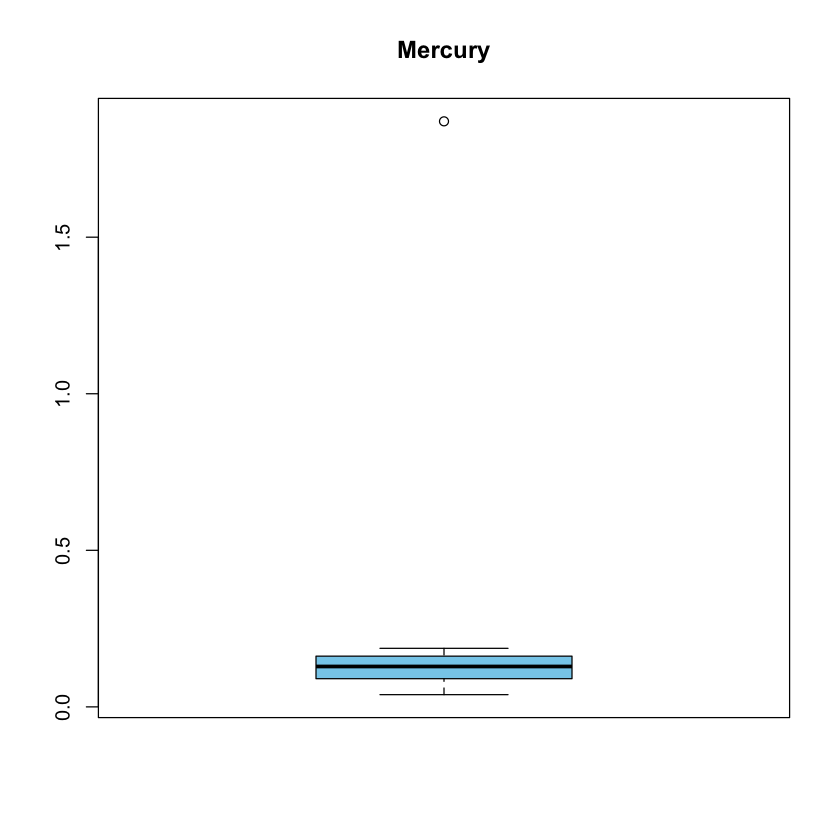

In [19]:
box_plot_function(df, full_plot = FALSE)

- Bộ dữ liệu tồn tại outlier

In [20]:
outlier_df = check_outlier_function(df, c("Mercury"))
outlier_df

[1] "So outlier cua cot  Mercury :  "
[1] "Tong so outlier cua df:  1"
Phan tram outlier: 3.33333333333333%


X1.87
<dbl>
1.87


### (b) Tiến hành quá trình bootstrap cho trung bình, và lưu lại kết quả cho sai số chuẩn bootstrap, cũng như khoảng tin cậy 95%

In [21]:

out_boot = boot(data =df$Mercury,
statistic = mean_boot_ktc_fun,
R = 1000
)
out_boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$Mercury, statistic = mean_boot_ktc_fun, R = 1000)


Bootstrap Statistics :
       original        bias    std. error
t1* 0.181866667  9.427667e-04  0.05816874
t2* 0.003447666 -9.235572e-05  0.00312795

In [22]:
# Khoảng tin cậy bootsrap 95%:
boot.ci(out_boot, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   ( 0.0669,  0.2949 )   ( 0.0564,  0.2511 )   ( 0.1059,  0.7191 )  

Level     Percentile            BCa          
95%   ( 0.1127,  0.3073 )   ( 0.1189,  0.4225 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable

### (c) Tìm và loại bỏ các giá trị ngoại lai trong dữ liệu. Sau đó, lặp lại công việc được làm ở câu (b)

In [23]:
# Tính giá trị của Q1, Q3 và IQR
Q1 <- quantile(df$Mercury, 0.25)
Q3 <- quantile(df$Mercury, 0.75)
IQR_value <- Q3 - Q1

# Xác định ngưỡng dưới và ngưỡng trên
lower_bound <- Q1 - 1.5 * IQR_value
upper_bound <- Q3 + 1.5 * IQR_value

# Loại bỏ outlier
df <- df[df$Mercury >= lower_bound & df$Mercury <= upper_bound, ]
df = data.frame(Mercury = df)
# head(df)

In [24]:
out_boot_remove_outlier = boot(data =df$Mercury,
statistic = mean_boot_ktc_fun,
R = 1000
)
out_boot_remove_outlier


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$Mercury, statistic = mean_boot_ktc_fun, R = 1000)


Bootstrap Statistics :
        original        bias     std. error
t1* 1.236552e-01 -3.594138e-04 7.732145e-03
t2* 6.330856e-05 -2.031499e-06 1.101059e-05

In [25]:
# Khoảng tin cậy bootsrap 95% sau khi remove outliers:
boot.ci(out_boot_remove_outlier, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot_remove_outlier, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   ( 0.1089,  0.1392 )   ( 0.1093,  0.1393 )   ( 0.1078,  0.1398 )  

Level     Percentile            BCa          
95%   ( 0.1080,  0.1380 )   ( 0.1075,  0.1378 )  
Calculations and Intervals on Original Scale

### (d) Tác động của việc loại bỏ giá trị ngoại lai tới phân phối bootstrap, cụ thể hơn, đối với sai số chuẩn, là như thế nào?

In [26]:
out_boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$Mercury, statistic = mean_boot_ktc_fun, R = 1000)


Bootstrap Statistics :
       original        bias    std. error
t1* 0.181866667  9.427667e-04  0.05816874
t2* 0.003447666 -9.235572e-05  0.00312795

In [27]:
out_boot_remove_outlier


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$Mercury, statistic = mean_boot_ktc_fun, R = 1000)


Bootstrap Statistics :
        original        bias     std. error
t1* 1.236552e-01 -3.594138e-04 7.732145e-03
t2* 6.330856e-05 -2.031499e-06 1.101059e-05

- Sai số chuẩn (std. error) giảm đáng kể sau khi loại bỏ outlier.
- Trước khi loại bỏ outlier, sai số chuẩn của t1* là 0.05816874 và của t2* là 0.00312795. Các giá trị này lớn hơn nhiều so với sau khi loại bỏ outlier (t1* = 7.732145e-03 và t2* = 1.101059e-05).
- Giảm sai số chuẩn sau khi loại bỏ outlier cho thấy rằng các giá trị trung bình ước tính trở nên ổn định và đáng tin cậy hơn. Outliers có thể làm sai lệch giá trị trung bình và tăng độ biến động trong mẫu dữ liệu, dẫn đến sai số chuẩn lớn hơn.


# BÀI 4

In [28]:
df = read_csv_function(base_path = base_path,file_name = "TV.csv")
head(df)

,ID,Times,Cable
,<int>,<dbl>,<chr>
1,1,7.0,Basic
2,2,10.0,Basic
3,3,10.6,Basic
4,4,10.2,Basic
5,5,8.6,Basic
6,6,7.6,Basic


In [29]:
EDA_function(df)


So dong cua du lieu: 20
So cot cua du lieu: 3
[1] "Cau truc cua du lieu: "
'data.frame':	20 obs. of  3 variables:
 $ ID   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Times: num  7 10 10.6 10.2 8.6 7.6 8.2 10.4 11 8.5 ...
 $ Cable: chr  "Basic" "Basic" "Basic" "Basic" ...
NULL
[1] "unique cua tung cot"
ID: 20
Times: 18
Cable: 2
[1] "Gia tri bi thieu:"


ID Times Cable 
    0     0     0

In [30]:
Basic = df[df[["Cable"]] == "Basic",]
Extended = df[df[["Cable"]] == "Extended",]

In [31]:
summary(Basic)

       ID            Times           Cable          
 Min.   : 1.00   Min.   : 7.000   Length:10         
 1st Qu.: 3.25   1st Qu.: 8.275   Class :character  
 Median : 5.50   Median : 9.300   Mode  :character  
 Mean   : 5.50   Mean   : 9.210                     
 3rd Qu.: 7.75   3rd Qu.:10.350                     
 Max.   :10.00   Max.   :11.000                     

In [32]:
summary(Extended)

       ID            Times         Cable          
 Min.   :11.00   Min.   :3.40   Length:10         
 1st Qu.:13.25   1st Qu.:5.10   Class :character  
 Median :15.50   Median :7.70   Mode  :character  
 Mean   :15.50   Mean   :6.87                     
 3rd Qu.:17.75   3rd Qu.:7.95                     
 Max.   :20.00   Max.   :9.60                     

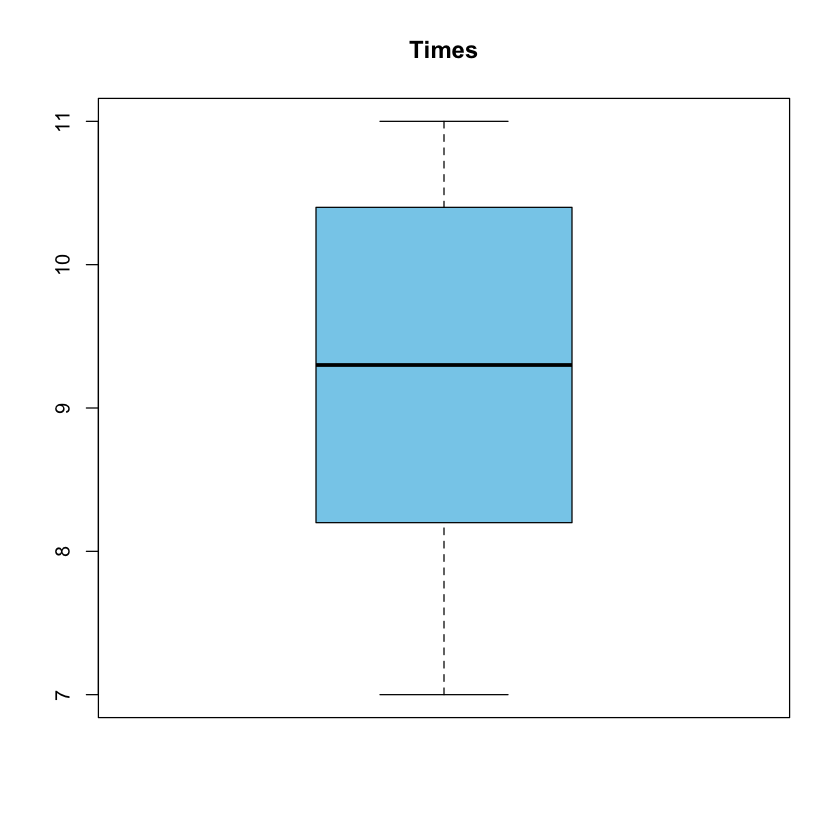

In [33]:
box_plot_function(Basic, list_col = c("Times"),full_plot = FALSE)

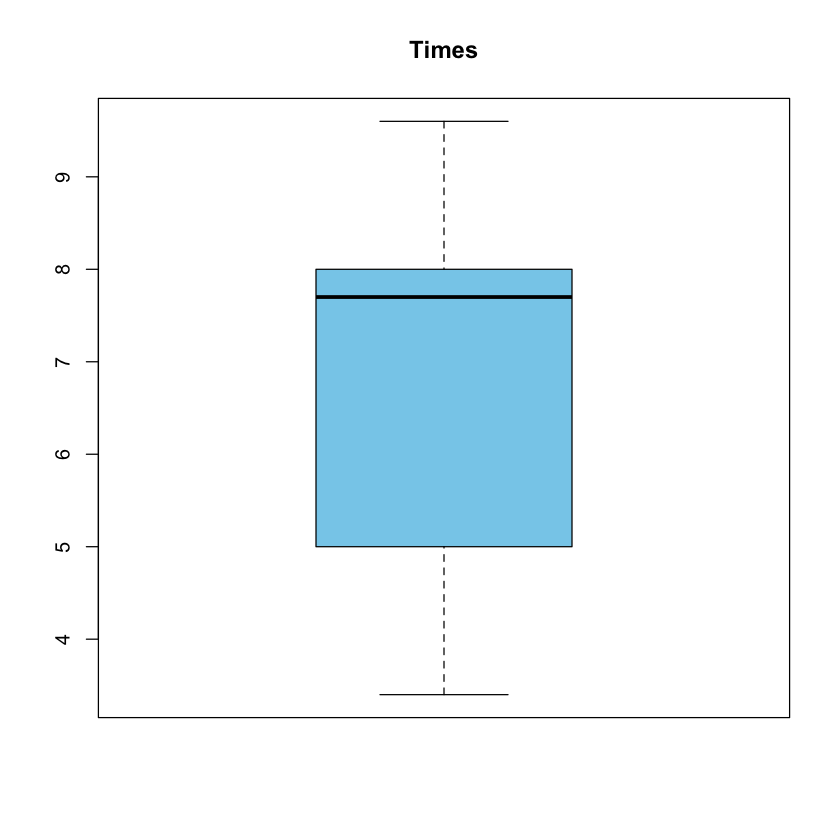

In [34]:
box_plot_function(Extended, list_col = c("Times"),full_plot = FALSE)

- Thời lượng quảng cáo trung bình ở loại kinh Basic cao hơn thời lượng quảng cáo trung bình ở kênh Extended 2.34 phút
- Thời lượng quảng cáo ở kênh Basic trải dài từ: 7 đến 11 phút
- Thời lượng quảng cáo ở kênh Extended: từ 3.4 đến 9.6 phút

In [35]:
df_new = data.frame(
 Basic = df[df[["Cable"]] == "Basic", "Times"],
 Extended = df[df[["Cable"]] == "Extended", "Times"]
)
df_new

Basic,Extended
<dbl>,<dbl>
7.0,3.4
10.0,7.8
10.6,9.4
10.2,4.7
8.6,5.4
7.6,7.6
8.2,5.0
10.4,8.0
11.0,7.8


In [36]:
out_mean_diff <- boot(data = df_new[, c("Basic", "Extended")], statistic = boot_diff_mean_fun, R = 1000)
out_mean_diff


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df_new[, c("Basic", "Extended")], statistic = boot_diff_mean_fun, 
    R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 2.3400000  0.00380000   0.5394907
t2* 0.3007458 -0.01390721   0.1245300

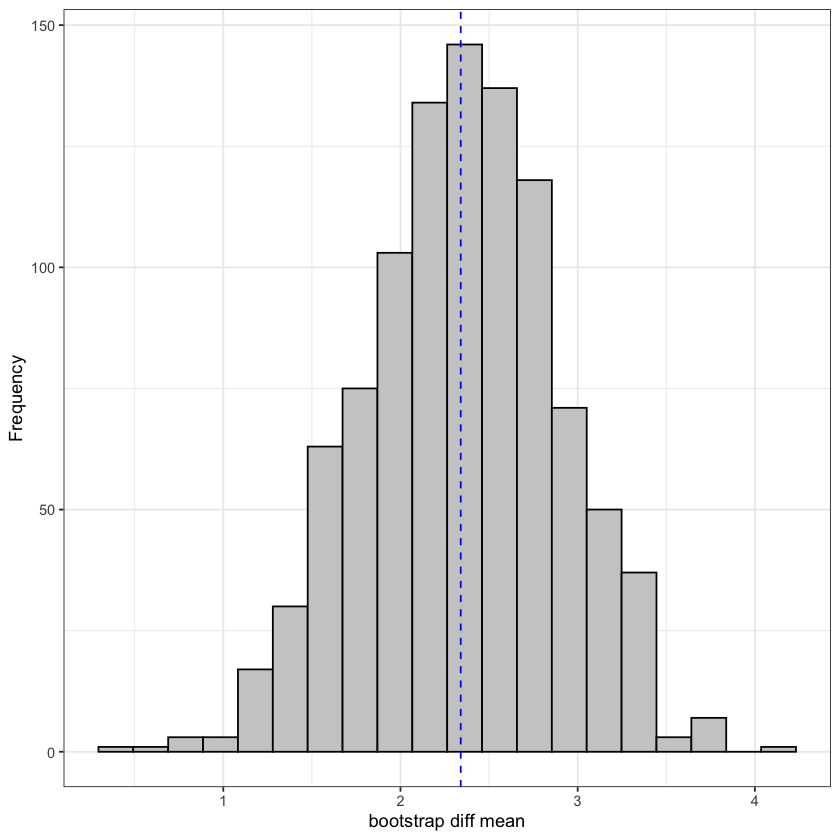

In [37]:
ggplot(data = data.frame(t = out_mean_diff$t[,1]), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_mean_diff$t0[1], color = "blue", linetype = "dashed") +
xlab("bootstrap diff mean") + ylab("Frequency") +
theme_bw()

In [38]:
# Khoảng tin cậy bootstrap 95% cho sự khác biệt về thời gian trung bình giữa Basic và Extended:
boot.ci(out_mean_diff, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_mean_diff, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   ( 1.279,  3.394 )   ( 1.370,  3.409 )   ( 0.622,  3.429 )  

Level     Percentile            BCa          
95%   ( 1.271,  3.310 )   ( 1.177,  3.280 )  
Calculations and Intervals on Original Scale

- Normal Interval: (1.279, 3.394): Đây là khoảng tin cậy dựa trên giả định rằng phân phối của thống kê bootstrap là phân phối chuẩn. Khoảng tin cậy này cho thấy sự khác biệt trung bình giữa hai loại truyền hình cáp nằm trong khoảng từ 1.279 đến 3.394 với độ tin cậy 95%.
- Basic Interval: (1.370, 3.409): Khoảng tin cậy này được tính từ các giá trị gốc (original values) và điều chỉnh sai số của ước lượng. Nó cho thấy khoảng tin cậy từ 1.370 đến 3.409 cho sự khác biệt trung bình giữa hai loại truyền hình cáp.
- Studentized Interval: (0.622, 3.429): Khoảng tin cậy này điều chỉnh dựa trên phân phối của thống kê chuẩn hóa (studentized statistic). Khoảng này rộng hơn và cho thấy khoảng tin cậy từ 0.622 đến 3.429.
- Percentile Interval: (1.271, 3.310): Đây là khoảng tin cậy được tính từ các percentiles của các giá trị bootstrap. Khoảng tin cậy này cho thấy sự khác biệt trung bình nằm trong khoảng từ 1.271 đến 3.310.
- BCa (Bias-Corrected and Accelerated) Interval: (1.177, 3.280): Khoảng tin cậy này điều chỉnh cho độ lệch và biến động của mẫu. Đây là một trong những khoảng tin cậy chính xác nhất, cho thấy khoảng tin cậy từ 1.177 đến 3.280.


### (c): Ước tính bootstrap của độ lệch là bao nhiêu? Tỷ số giữa độ lệch và sai số chuẩn bootstrap là bao nhiêu

- Độ lệch của t1: 0.00380000
- Độ lệch của t2: -0.01390721
- Ước tính bootstrap của độ lệch (t1): 0.00380000
- Tỷ số giữa độ lệch và sai số chuẩn bootstrap (t1): 0.00704
- Ước tính bootstrap của độ lệch (t2): -0.01390721
- Tỷ số giữa độ lệch và sai số chuẩn bootstrap (t2): -0.1116

### (d): Dựa vào khoảng tin cậy được xây dựng ở câu (b), ta có thể kết luận gì về sự có ý nghĩa khi so sánh trung bình thời gian quảng cáo trên hai loại truyền hình cáp.

- Với khoảng tin cậy 95%, chúng ta có thể nói rằng sự khác biệt trung bình giữa thời gian trung bình của hai loại truyền hình cáp là đáng kể, và khoảng tin cậy của sự khác biệt trung bình này nằm trong các khoảng khác nhau tùy theo phương pháp tính toán, nhưng nhìn chung đều chỉ ra một sự khác biệt dương.


# BÀI 6

In [39]:
df = read_csv_function(base_path, "IceCream.csv", TRUE)
head(df)

,Brand,VanillaCalories,VanillaFat,VanillaSugar,ChocolateCalories,ChocolateFat,ChocolateSugar
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Baskin Robbins,260,16.0,26.0,260,14,31.0
2,Ben & Jerry's,240,16.0,19.0,260,16,22.0
3,Blue Bunny,140,7.0,12.0,130,7,14.0
4,Breyers,140,7.0,13.0,140,8,16.0
5,Brigham's,190,12.0,17.0,200,12,18.0
6,Bulla,234,13.5,21.8,266,15,22.6


In [40]:
vani = df[, c("Brand", "VanillaCalories", "VanillaFat", "VanillaSugar")]
choco = df[, c("Brand", "ChocolateCalories", "ChocolateFat", "ChocolateFat")]

In [41]:
summary(df[,c("VanillaCalories", "ChocolateCalories")])

 VanillaCalories ChocolateCalories
 Min.   :120.0   Min.   :120.0    
 1st Qu.:140.0   1st Qu.:140.0    
 Median :160.0   Median :170.0    
 Mean   :191.4   Mean   :198.7    
 3rd Qu.:240.0   3rd Qu.:260.0    
 Max.   :307.0   Max.   :320.0    

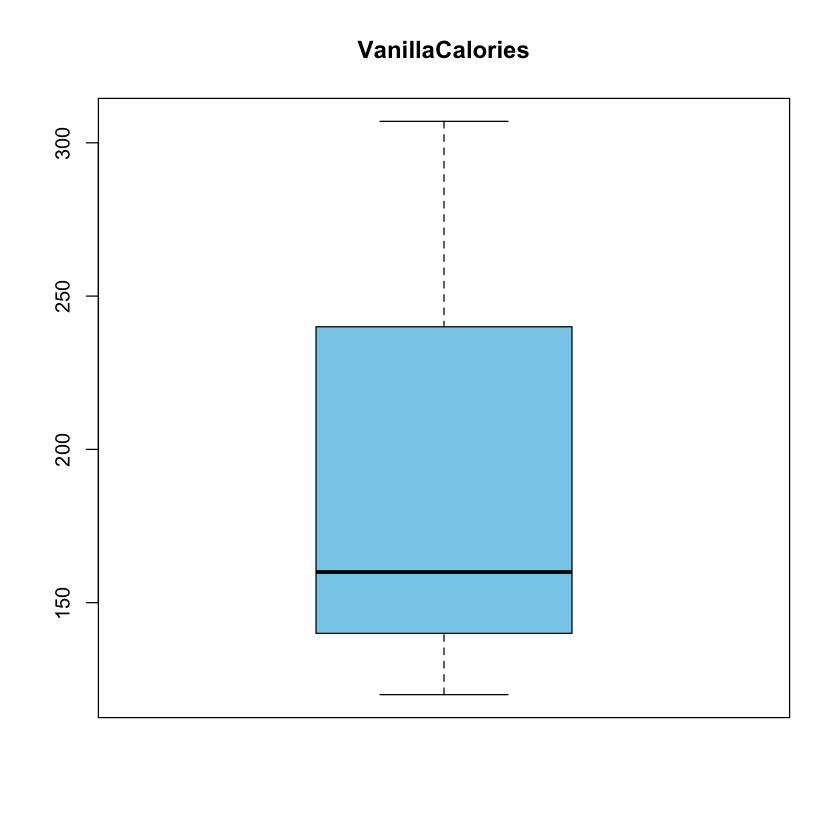

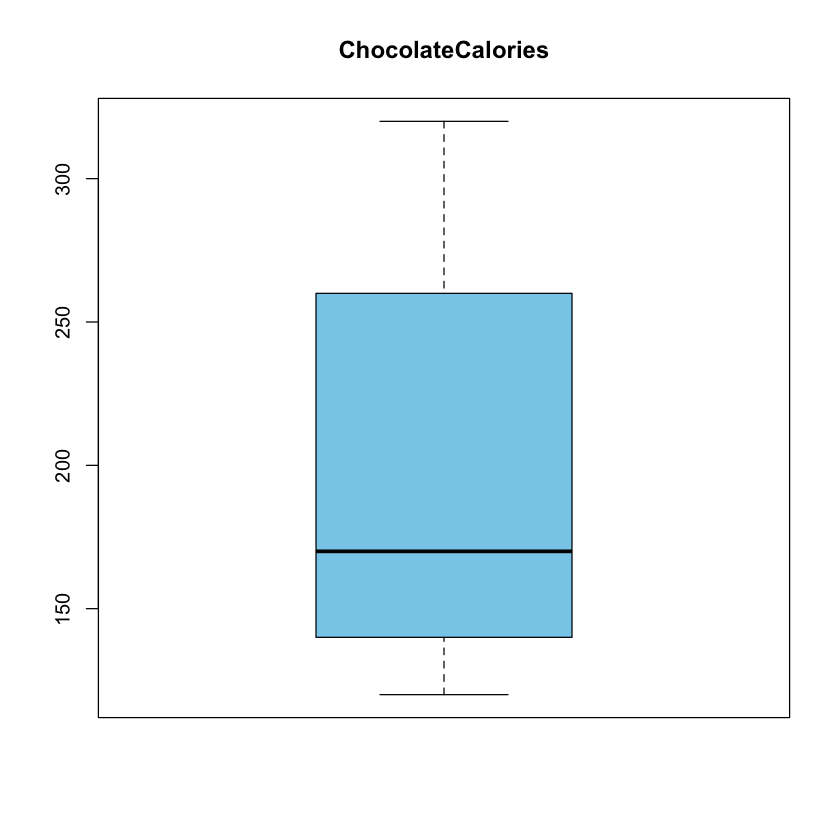

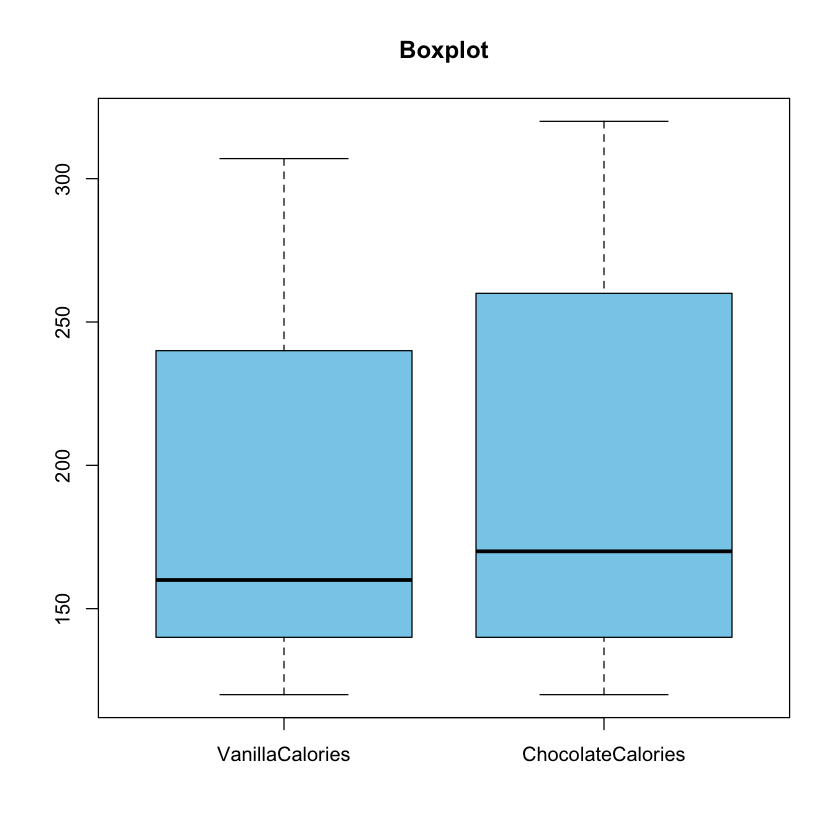

In [42]:
box_plot_function(df[,c("VanillaCalories", "ChocolateCalories")], full_plot = TRUE)

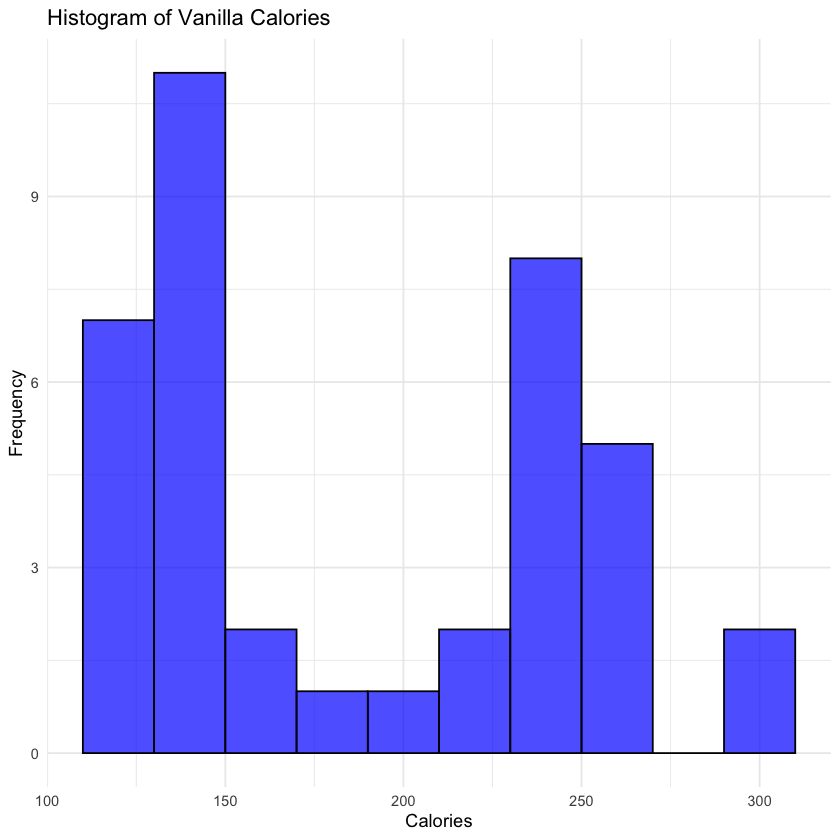

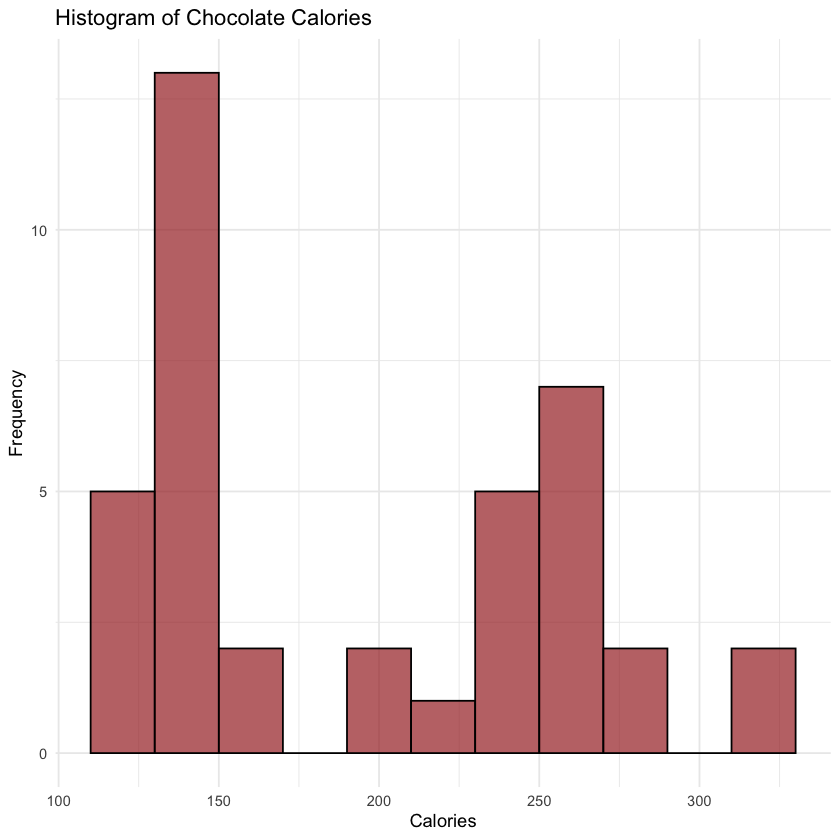

In [43]:
# Vẽ biểu đồ histogram
ggplot(df, aes(x = VanillaCalories)) +
  geom_histogram(binwidth = 20, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Vanilla Calories", x = "Calories", y = "Frequency") +
  theme_minimal()

ggplot(df, aes(x = ChocolateCalories)) +
  geom_histogram(binwidth = 20, fill = "brown", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Chocolate Calories", x = "Calories", y = "Frequency") +
  theme_minimal()

### (b) Sử dụng bootstrap để xác định xem có sự khác biệt về số lượng calo trung bình hay không.

In [44]:
out_mean_diff <- boot(data = df[, c("VanillaCalories", "ChocolateCalories")], statistic = boot_diff_mean_calo_fun, R = 1000)
out_mean_diff


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df[, c("VanillaCalories", "ChocolateCalories")], 
    statistic = boot_diff_mean_calo_fun, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* -7.333333 -0.02994872    2.050013
t2*  4.124390 -0.05723425    1.342197

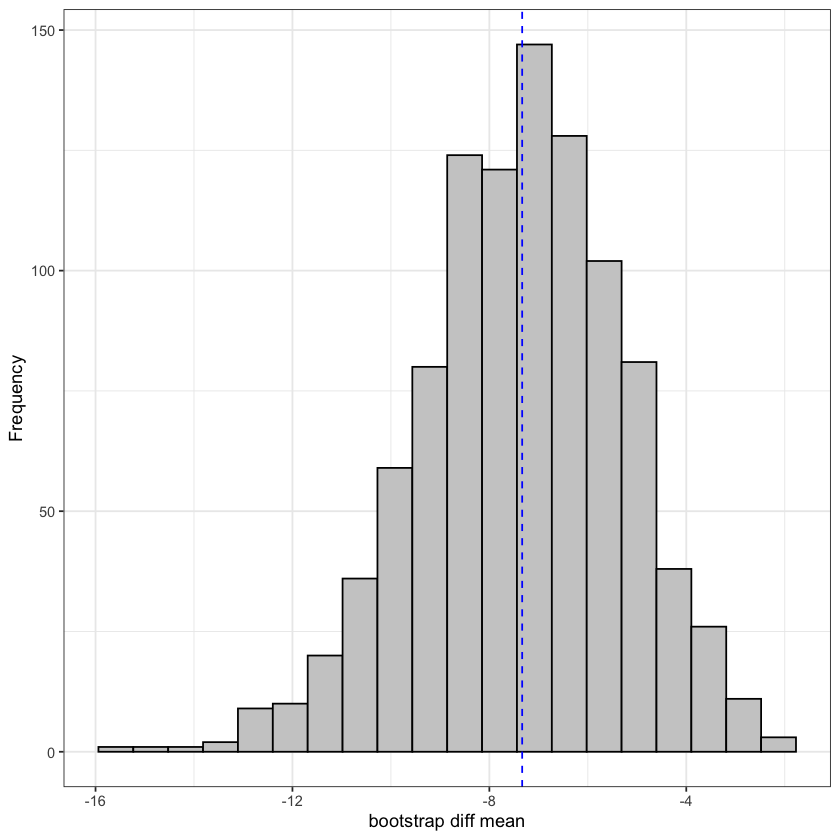

In [45]:
ggplot(data = data.frame(t = out_mean_diff$t[,1]), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_mean_diff$t0[1], color = "blue", linetype = "dashed") +
xlab("bootstrap diff mean") + ylab("Frequency") +
theme_bw()

In [46]:
# Khoảng tin cậy bootstrap 95% cho sự khác biệt về thời gian trung bình giữa Basic và Extended:
boot.ci(out_mean_diff, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_mean_diff, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   (-11.321,  -3.285 )   (-11.077,  -3.052 )   (-11.975,  -3.350 )  

Level     Percentile            BCa          
95%   (-11.615,  -3.590 )   (-12.119,  -3.754 )  
Calculations and Intervals on Original Scale

- Tất cả các khoảng tin cậy đều không chứa giá trị 0
- Có sự khác biệt có ý nghĩa thống kê giữa lượng calo trung bình của hai hương vị Vanilla và Chocolate.
Lượng calo trung bình của hương vị Chocolate cao hơn đáng kể so với hương vị Vanilla, dựa trên tất cả các phương pháp bootstrap đã sử dụng.

# BÀI 7

In [47]:
df = read_csv_function(base_path, "BookPrices.csv", TRUE)
head(df)

,Subject,Area,Price
,<chr>,<chr>,<dbl>
1,Biology,Math & Science,190.70
2,Biology,Math & Science,160.00
3,Biology,Math & Science,117.30
4,Biology,Math & Science,115.15
5,Chemistry,Math & Science,222.67
6,Chemistry,Math & Science,174.95


In [48]:

# Lấy các cột Price theo các khu vực khác nhau
math_science_prices <- df[df[["Area"]] == "Math & Science", "Price"]
social_sciences_prices <- df[df[["Area"]] == "Social Sciences", "Price"]

# Xác định độ dài lớn nhất
max_length <- max(length(math_science_prices), length(social_sciences_prices))

# Tạo data.frame với chiều dài bằng nhau, điền NA vào các giá trị thiếu
df_new <- data.frame(
  Math_science = c(math_science_prices, rep(NA, max_length - length(math_science_prices))),
  Social = c(social_sciences_prices, rep(NA, max_length - length(social_sciences_prices)))
)
# Hiển thị kết quả
print(df_new)


   Math_science Social
1        190.70  31.95
2        160.00 209.00
3        117.30 104.00
4        115.15 168.00
5        222.67 168.00
6        174.95 163.35
7        197.15 178.70
8        196.40  15.00
9        197.50  11.00
10       157.80  26.95
11       178.70  17.00
12        77.95 138.70
13       128.00 136.00
14       138.00 139.95
15       134.40  15.95
16       137.35 139.33
17       222.00  19.95
18       138.70     NA
19       138.70     NA
20       106.65     NA
21       174.00     NA
22       172.35     NA
23       149.35     NA
24       200.00     NA
25       192.70     NA
26        85.35     NA
27       128.00     NA


In [49]:
summary(df_new[,c("Math_science", "Social")])

  Math_science        Social      
 Min.   : 77.95   Min.   : 11.00  
 1st Qu.:131.20   1st Qu.: 19.95  
 Median :157.80   Median :136.00  
 Mean   :156.73   Mean   : 98.99  
 3rd Qu.:191.70   3rd Qu.:163.35  
 Max.   :222.67   Max.   :209.00  
                  NA's   :10      

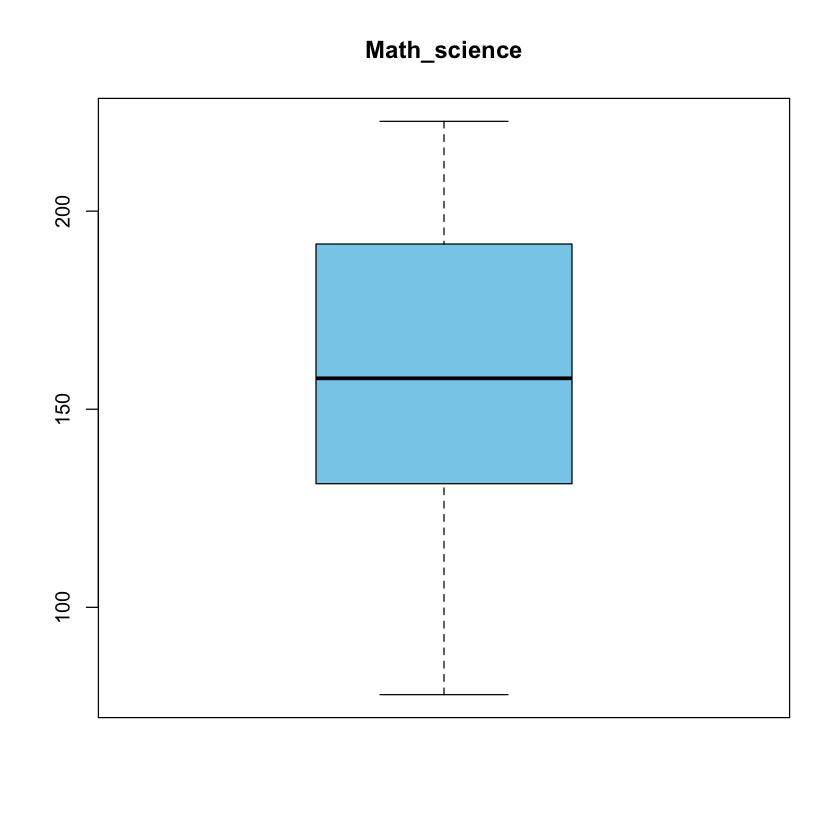

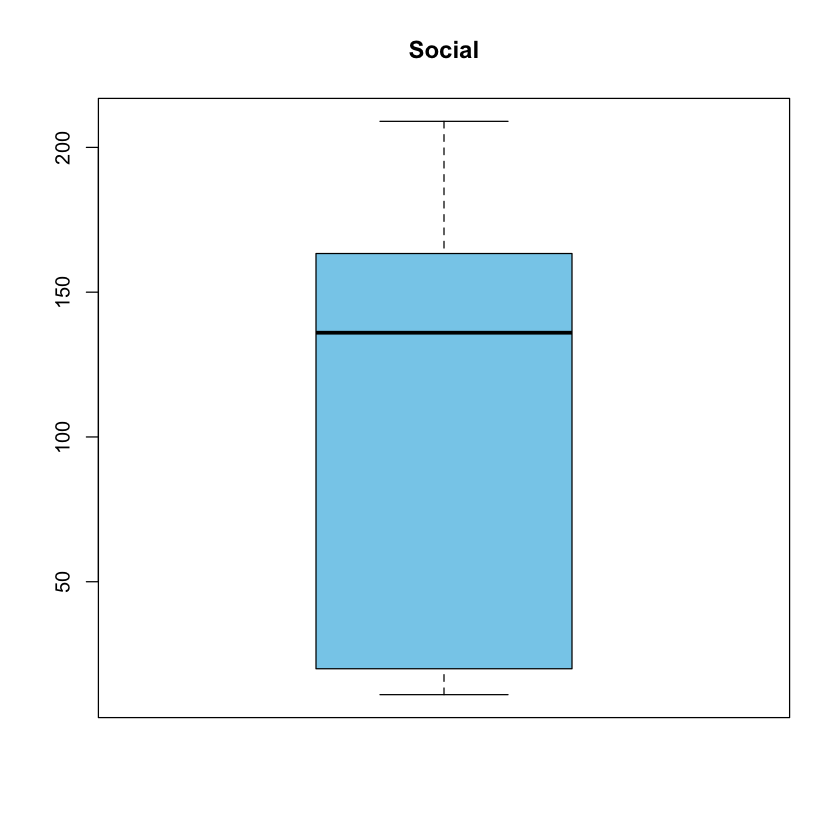

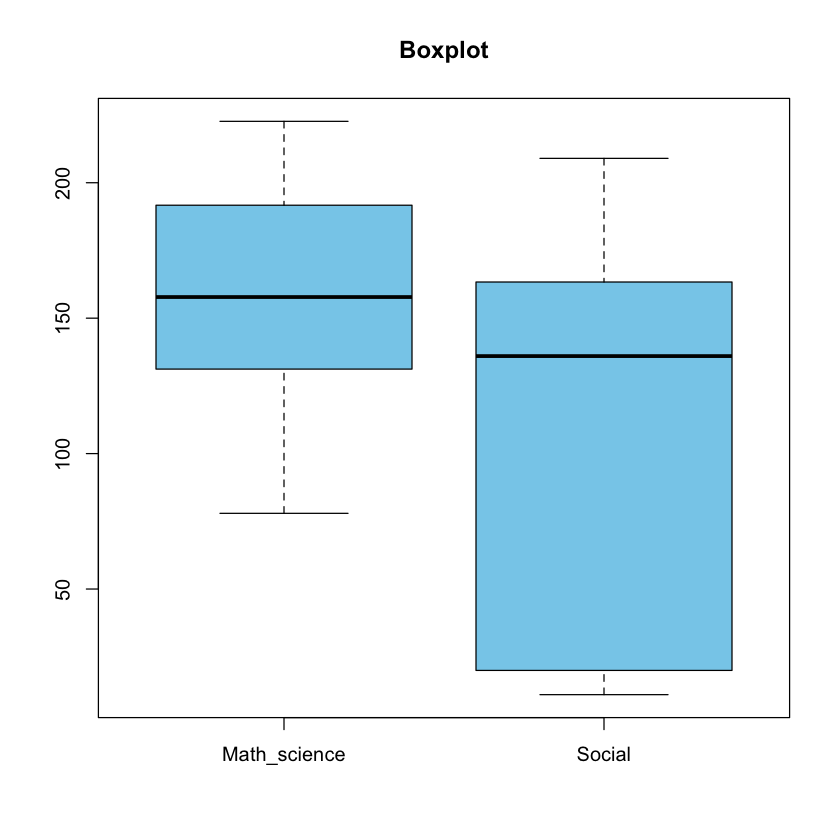

In [50]:
box_plot_function(df_new[,c("Math_science", "Social")], full_plot = TRUE)

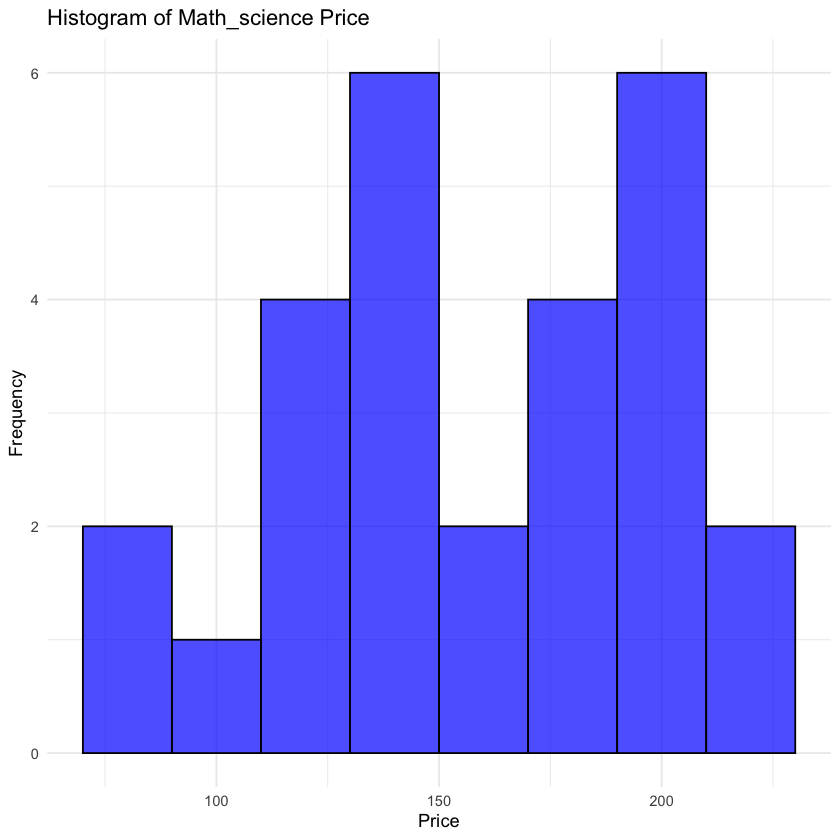

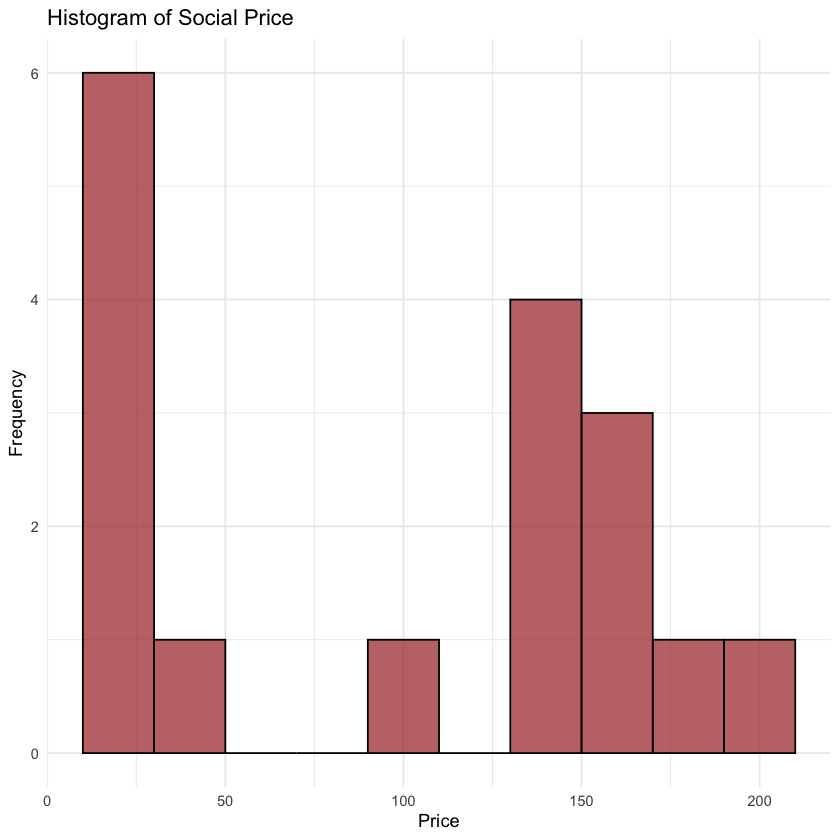

In [51]:
# Vẽ biểu đồ histogram
ggplot(df_new, aes(x = Math_science)) +
  geom_histogram(binwidth = 20, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Math_science Price", x = "Price", y = "Frequency") +
  theme_minimal()

ggplot(df_new, aes(x = Social)) +
  geom_histogram(binwidth = 20, fill = "brown", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Social Price", x = "Price", y = "Frequency") +
  theme_minimal()

### (b) Thực hiện quá trình bootstrap cho giá sách trung bình cho từng lĩnh vực riêng biệt và mô tả các phân phối bootstrap

In [52]:
# Toán - KHTN
out_boot_Math_science = boot(data =df_new$Math_science,
statistic = mean_boot_ktc_fun,
R = 1000
)
out_boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$Mercury, statistic = mean_boot_ktc_fun, R = 1000)


Bootstrap Statistics :
       original        bias    std. error
t1* 0.181866667  9.427667e-04  0.05816874
t2* 0.003447666 -9.235572e-05  0.00312795

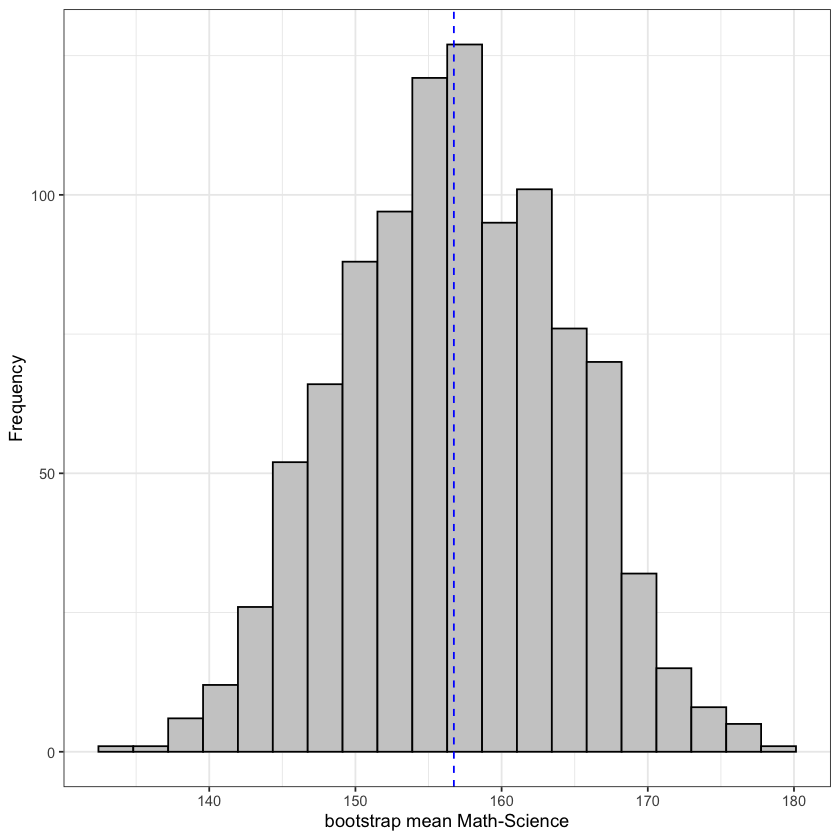

In [53]:
ggplot(data = data.frame(t = out_boot_Math_science$t[,1]), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_boot_Math_science$t0[1], color = "blue", linetype = "dashed") +
xlab("bootstrap mean Math-Science") + ylab("Frequency") +
theme_bw()

In [54]:
# KHXH
out_boot_Social = boot(data =df_new$Social,
statistic = mean_boot_ktc_fun,
R = 1000
)
out_boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$Mercury, statistic = mean_boot_ktc_fun, R = 1000)


Bootstrap Statistics :
       original        bias    std. error
t1* 0.181866667  9.427667e-04  0.05816874
t2* 0.003447666 -9.235572e-05  0.00312795

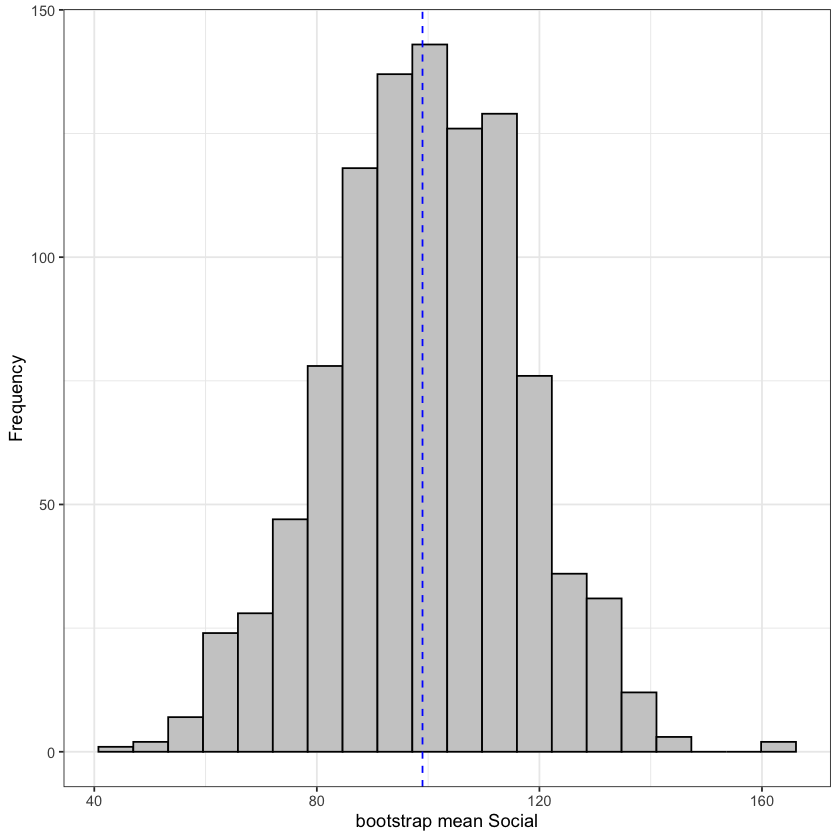

In [55]:
ggplot(data = data.frame(t = out_boot_Social$t[,1]), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_boot_Social$t0[1], color = "blue", linetype = "dashed") +
xlab("bootstrap mean Social") + ylab("Frequency") +
theme_bw()

### (c): Thực hiện quá trình bootstrap cho tỷ lệ của trung bình giá sách của hai lĩnh vực. Cung cấp biểu đồ phân phối bootstrap và nhận xét.

In [56]:
out_mean_raito <- boot(data = df_new[, c("Math_science", "Social")], statistic = boot_diff_mean_price_fun, R = 1000)
out_mean_raito


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df_new[, c("Math_science", "Social")], statistic = boot_diff_mean_price_fun, 
    R = 1000)


Bootstrap Statistics :
      original     bias    std. error
t1* 1.58333240 0.04863707   0.3240281
t2* 0.09698109 0.07661793   0.1914954

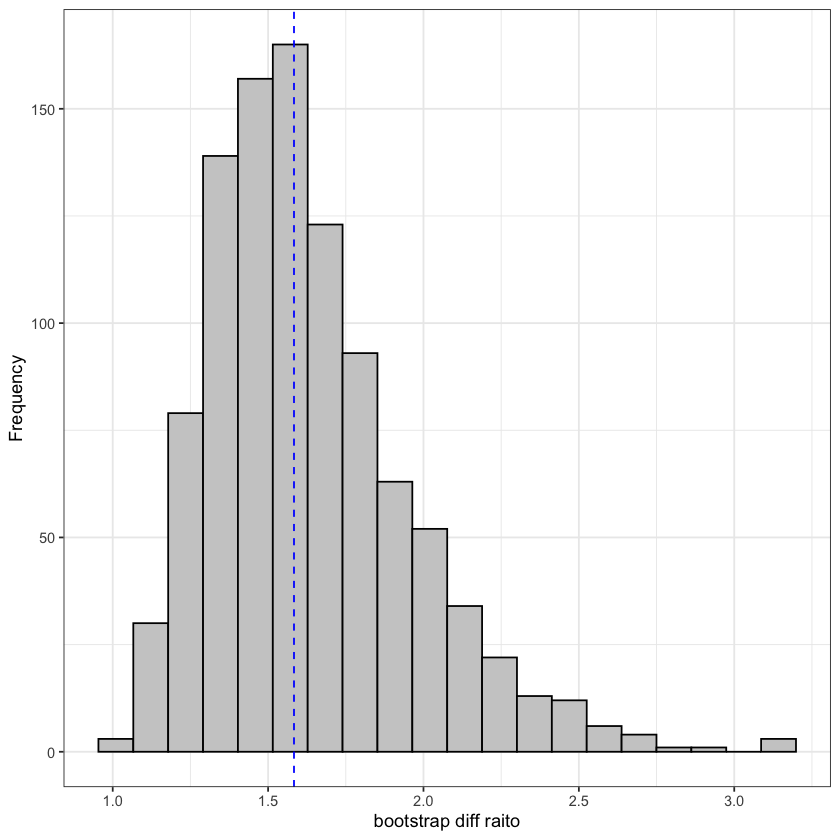

In [57]:
ggplot(data = data.frame(t = out_mean_raito$t[,1]), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_mean_raito$t0[1], color = "blue", linetype = "dashed") +
xlab("bootstrap diff raito") + ylab("Frequency") +
theme_bw()

### (d): Tìm khoảng tin cậy bootstrap 95% cho tỷ lệ của trung bình giá sách. Giải thích kết quả thu được.

In [58]:
# Khoảng tin cậy bootstrap 95% cho ỷ lệ của trung bình giá sách của hai lĩnh vực:
boot.ci(out_mean_raito, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_mean_raito, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   ( 0.900,  2.170 )   ( 0.727,  2.013 )   ( 1.228,  2.474 )  

Level     Percentile            BCa          
95%   ( 1.153,  2.439 )   ( 1.170,  2.485 )  
Calculations and Intervals on Original Scale


- Normal Approximation Interval: Khoảng tin cậy: (0.900, 2.170)
Dựa trên giả định rằng phân phối của các giá trị ước lượng bootstrap là phân phối chuẩn.
- Basic Bootstrap Interval: Khoảng tin cậy: (0.727, 2.013)
Dựa trên các thứ hạng của các ước lượng bootstrap, điều chỉnh các biên giới dựa trên phân phối của chúng.
- Studentized Interval: Khoảng tin cậy: (1.228, 2.474)
Dựa trên việc chuẩn hóa các ước lượng bootstrap và thường được coi là chính xác hơn khi kích thước mẫu nhỏ.
- Percentile Interval: Khoảng tin cậy: (1.153, 2.439)
Sử dụng các phần trăm của phân phối bootstrap.
- Bias-Corrected and Accelerated (BCa) Interval: Khoảng tin cậy: (1.170, 2.485)
Điều chỉnh cả độ lệch và gia tốc trong phân phối của các ước lượng bootstrap.

### (e): Ước tính bootstrap của độ lệch là bao nhiêu? Tỷ số giữa độ lệch và sai số chuẩn bootstrap là bao nhiêu?

- Bias (Độ lệch):
    - t1*: 0.04863707
    - t2*: 0.07661793
- Standard Error (Sai số chuẩn):
    - t1*: 0.3240281
    - t2*: 0.1914954
- Bias to Standard Error Ratio (Tỷ số giữa độ lệch và sai số chuẩn):
    - t1*: 0.1501
    - t2*: 0.4001


# BÀI 8

In [59]:
# Số liệu
n1 <- 50
n2 <- 50
p1_hat <- 30 / 50
p2_hat <- 40 / 50

# Ước lượng hợp lý cực đại cho to
to_hat <- p2_hat - p1_hat

# Sai số chuẩn cho p1 và p2
se_p1 <- sqrt(p1_hat * (1 - p1_hat) / n1)
se_p2 <- sqrt(p2_hat * (1 - p2_hat) / n2)

# Sai số chuẩn cho to
se_to <- sqrt(se_p1^2 + se_p2^2)

# Khoảng tin cậy 90%
z <- qnorm(0.05, lower.tail = FALSE)
ci_lower <- to_hat - z * se_to
ci_upper <- to_hat + z * se_to

# Kết quả
cat("Uoc luong hop ly cuc dai cho to:", to_hat, "\n")
cat("Sai so chuan cua uoc luong:", se_to, "\n")
cat("Khoang tin cay 90% cho to:", ci_lower, "-", ci_upper, "\n")


Uoc luong hop ly cuc dai cho to: 0.2 
Sai so chuan cua uoc luong: 0.08944272 
Khoang tin cay 90% cho to: 0.05287982 - 0.3471202 


### b. Tìm sai số chuẩn và khoảng tin cậy bằng phương pháp bootstrap.

In [60]:
df <- data.frame(
  thuoc_moi = c(rep(1, 30), rep(0, 20)),
  gia_duoc = c(rep(1, 40), rep(0, 10))
)

In [61]:
# Thuốc mới
out_boot_thuoc_moi = boot(data =df$thuoc_moi,
statistic = mean_boot_ktc_fun,
R = 1000
)
out_boot_thuoc_moi


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$thuoc_moi, statistic = mean_boot_ktc_fun, R = 1000)


Bootstrap Statistics :
       original        bias     std. error
t1* 0.600000000 -0.0001600000 0.0712871395
t2* 0.004897959 -0.0001029551 0.0003081169

In [62]:
# Khoảng tin cậy bootsrap 90%:
boot.ci(out_boot_thuoc_moi, conf = 0.9, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot_thuoc_moi, conf = 0.9, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
90%   ( 0.4829,  0.7174 )   ( 0.4800,  0.7200 )   ( 0.4691,  0.7177 )  

Level     Percentile            BCa          
90%   ( 0.48,  0.72 )   ( 0.50,  0.74 )  
Calculations and Intervals on Original Scale

In [63]:
# Giả dược
out_boot_gia_duoc = boot(data =df$gia_duoc,
statistic = mean_boot_ktc_fun,
R = 1000
)
out_boot_gia_duoc


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$gia_duoc, statistic = mean_boot_ktc_fun, R = 1000)


Bootstrap Statistics :
       original        bias     std. error
t1* 0.800000000  9.800000e-04 0.0566696661
t2* 0.003265306 -7.749388e-05 0.0006920869

In [64]:
# Khoảng tin cậy bootsrap 90%:
boot.ci(out_boot_gia_duoc, conf = 0.9, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot_gia_duoc, conf = 0.9, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
90%   ( 0.7058,  0.8922 )   ( 0.7000,  0.9000 )   ( 0.6667,  0.8873 )  

Level     Percentile            BCa          
90%   ( 0.70,  0.90 )   ( 0.72,  0.90 )  
Calculations and Intervals on Original Scale

# BÀI 9

In [65]:
n <- 100
mu <- 5
sigma <- 1
data <- rnorm(n, mean = mu, sd = sigma)
df = data.frame(data = data)

In [66]:
X_bar <- mean(data)
theta_hat <- exp(X_bar)

In [67]:
# Tính sai số chuẩn của theta_hat
se_theta_hat_delta <- theta_hat * 0.1

# Tính khoảng tin cậy 95%
z <- qnorm(0.025, lower.tail = FALSE)
ci_lower_delta <- theta_hat - z * se_theta_hat_delta
ci_upper_delta <- theta_hat + z * se_theta_hat_delta

# Kết quả
cat("Uoc luong hop ly cuc dai cho theta:", theta_hat, "\n")
cat("Sai so chuan cua uoc luong (Delta method):", se_theta_hat_delta, "\n")
cat("KTC 95% cho theta (Delta method):", ci_lower_delta, "-", ci_upper_delta, "\n")


Uoc luong hop ly cuc dai cho theta: 147.2778 
Sai so chuan cua uoc luong (Delta method): 14.72778 
KTC 95% cho theta (Delta method): 118.4119 - 176.1438 


### b. Tìm sai số chuẩn và khoảng tin cậy 95% bằng phương pháp bootstrap.

In [68]:
out_boot = boot(data =df$data,
statistic = mean_boot_ktc_fun,
R = 1000
)
out_boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$data, statistic = mean_boot_ktc_fun, R = 1000)


Bootstrap Statistics :
       original        bias    std. error
t1* 4.992320847  0.0027630647 0.093785031
t2* 0.008700608 -0.0001638423 0.001079095

In [69]:
# Khoảng tin cậy bootsrap 95%:
boot.ci(out_boot, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   ( 4.806,  5.173 )   ( 4.801,  5.175 )   ( 4.798,  5.185 )  

Level     Percentile            BCa          
95%   ( 4.809,  5.183 )   ( 4.802,  5.170 )  
Calculations and Intervals on Original Scale

# BÀI 10

In [70]:
data = c(4.94, 5.06, 4.53, 5.07, 4.99, 5.16, 4.38, 4.43, 4.93, 4.72, 4.92, 4.96)
df = data.frame(data = data)

In [71]:
EDA_function(df)

So dong cua du lieu: 12
So cot cua du lieu: 1
[1] "Cau truc cua du lieu: "
'data.frame':	12 obs. of  1 variable:
 $ data: num  4.94 5.06 4.53 5.07 4.99 5.16 4.38 4.43 4.93 4.72 ...
NULL
[1] "unique cua tung cot"
data: 12
[1] "Gia tri bi thieu:"


data 
   0

In [72]:
summary(df)

      data      
 Min.   :4.380  
 1st Qu.:4.673  
 Median :4.935  
 Mean   :4.841  
 3rd Qu.:5.008  
 Max.   :5.160  

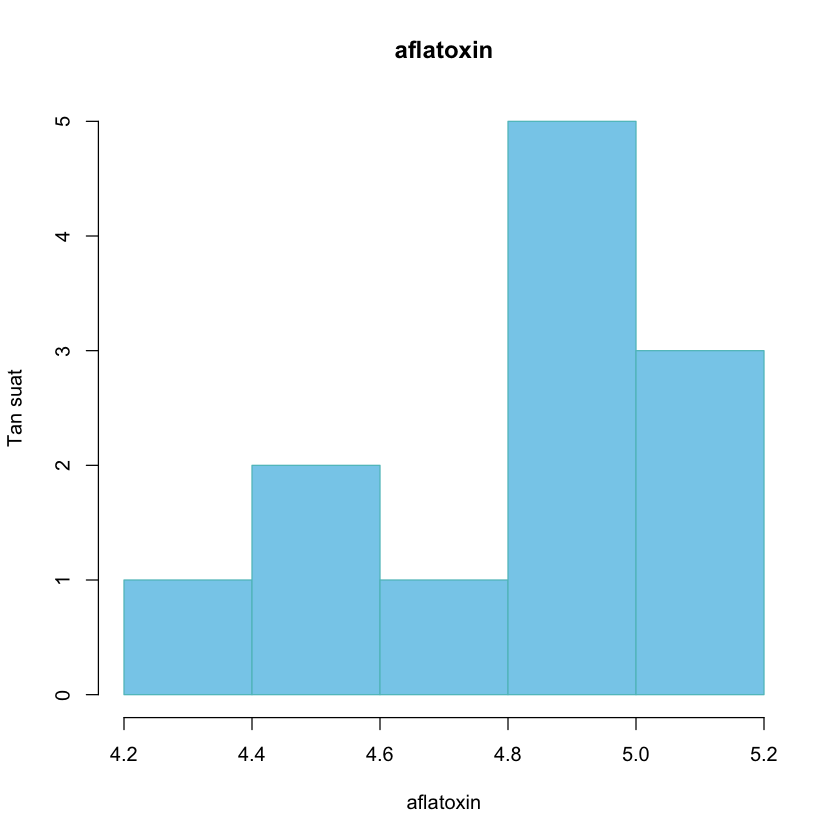

In [73]:
hist(df$data, main = "aflatoxin", xlab = "aflatoxin", ylab = "Tan suat", col = "skyblue", border = "#5EC0C5")

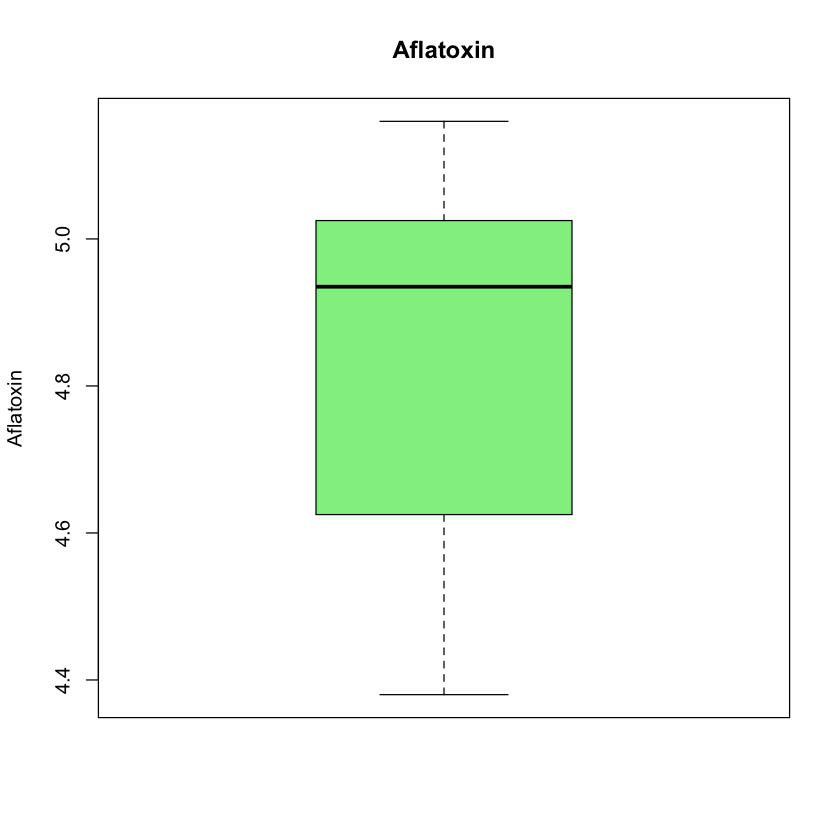

In [74]:
# Biểu đồ hộp
boxplot(df$data, main="Aflatoxin", ylab="Aflatoxin", col="lightgreen")


####  Kiểm tra tính phân phối chuẩn.

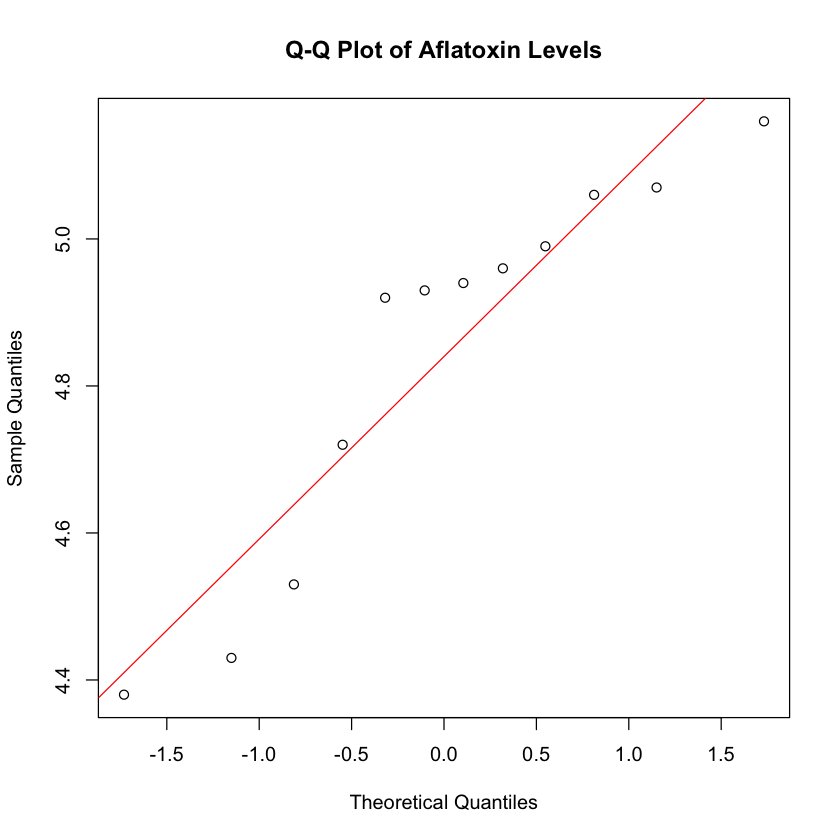

In [75]:
# Biểu đồ Q-Q
qqnorm(data, main="Q-Q Plot of Aflatoxin Levels")
qqline(data, col="red")


In [76]:
# Kiểm định Shapiro-Wilk
shapiro_test <- shapiro.test(data)

# Hiển thị kết quả kiểm định
print(shapiro_test)



	Shapiro-Wilk normality test

data:  data
W = 0.87092, p-value = 0.06713



- W = 0.87092
- p-value = 0.06713
- Với mức ý nghĩa alpha = 0.05, p-value = 0.06713: chúng ta không có đủ bằng chứng để bác bỏ giả thuyết rằng dữ liệu phân phối chuẩn.
- Do đó, kết luận là dữ liệu dư lượng aflatoxin có thể được coi là phân phối chuẩn với mức ý nghĩa 0.05.

In [77]:
# Kích thước mẫu
n <- length(data)

# Trung bình mẫu
mean_aflatoxin <- mean(data)

# Độ lệch chuẩn mẫu
sd_aflatoxin <- sd(df$data)

# Giá trị t cho mức ý nghĩa 95% và bậc tự do n-1
alpha <- 0.05
t_value <- qt(1 - alpha/2, df = n - 1)

# Khoảng tin cậy 95%
ci_lower <- mean_aflatoxin - t_value * (sd_aflatoxin / sqrt(n))
ci_upper <- mean_aflatoxin + t_value * (sd_aflatoxin / sqrt(n))

# Kết quả
cat("KTC 95% cho trung binh du luong aflatoxin:\n")
cat("Lower bound:", ci_lower, "\n")
cat("Upper bound:", ci_upper, "\n")

KTC 95% cho trung binh du luong aflatoxin:
Lower bound: 4.674344 
Upper bound: 5.007323 


### (c) Tìm sai số chuẩn và khoảng tin cậy 95% bằng phương pháp bootstrap

In [78]:
out_boot = boot(data =df$data,
statistic = mean_boot_ktc_fun,
R = 1000
)
out_boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = df$data, statistic = mean_boot_ktc_fun, R = 1000)


Bootstrap Statistics :
       original        bias    std. error
t1* 4.840833333 -0.0015800000 0.071061636
t2* 0.005721907 -0.0004468063 0.001718878

In [79]:
# Khoảng tin cậy bootsrap 95%:
boot.ci(out_boot, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_boot, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   ( 4.703,  4.982 )   ( 4.709,  4.988 )   ( 4.610,  4.979 )  

Level     Percentile            BCa          
95%   ( 4.693,  4.972 )   ( 4.686,  4.966 )  
Calculations and Intervals on Original Scale